<a href="https://colab.research.google.com/github/Krishnan-Raghavan/Packt/blob/main/DataCleaningAndPreparationChapter11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Required Libraries

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install statsmodels

Trends

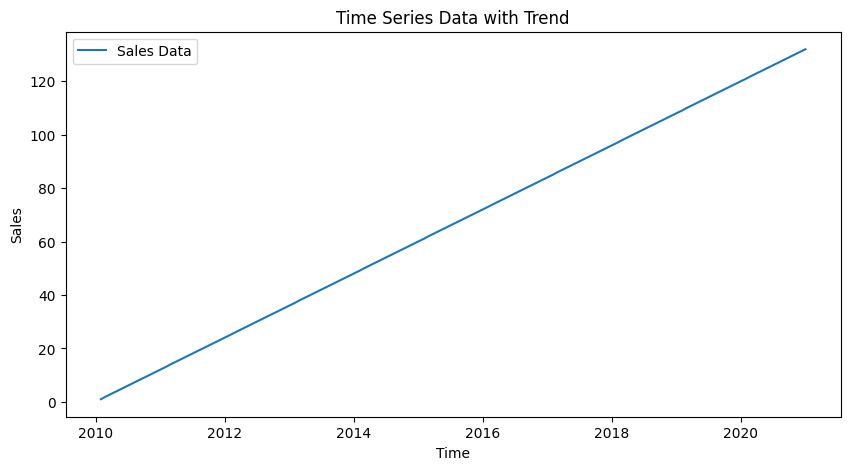

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate example data
date_rng = pd.date_range(start='2010-01-01', end='2020-12-31', freq='M')
sales_data = pd.Series(range(1, len(date_rng) + 1), index=date_rng)

# Plotting the time series data with a trend
plt.figure(figsize=(10, 5))
plt.plot(sales_data, label='Sales Data')
plt.title('Time Series Data with Trend')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

Seasonality

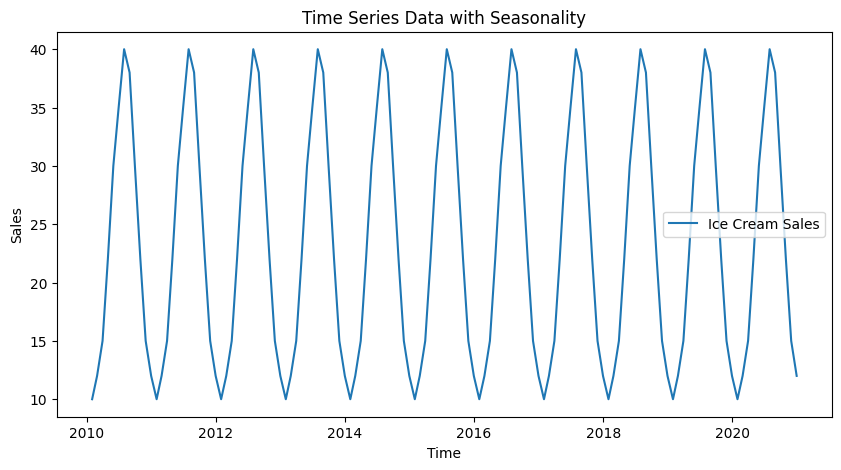

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate example data with seasonality
date_rng = pd.date_range(start='2010-01-01', end='2020-12-31', freq='M')
seasonal_data = pd.Series([10, 12, 15, 22, 30, 35, 40, 38, 30, 22, 15, 12] * 11, index=date_rng)

# Plotting the time series data with seasonality
plt.figure(figsize=(10, 5))
plt.plot(seasonal_data, label='Ice Cream Sales')
plt.title('Time Series Data with Seasonality')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

Noise

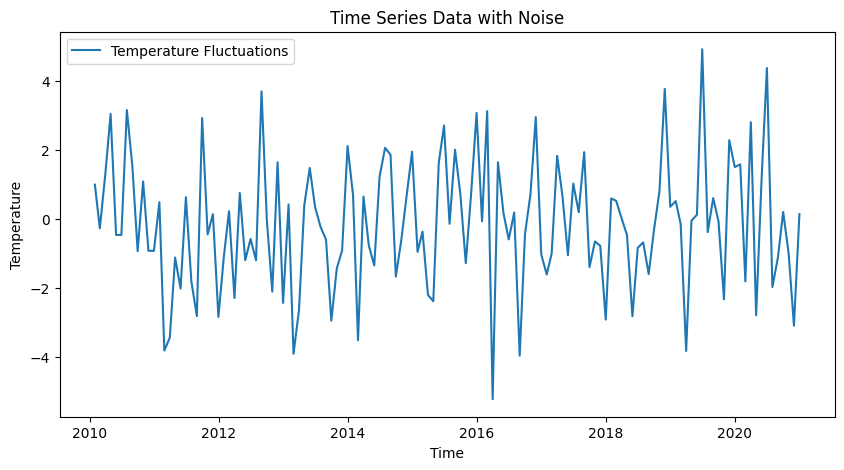

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate example data with noise
date_rng = pd.date_range(start='2010-01-01', end='2020-12-31', freq='M')
np.random.seed(42)
noise_data = pd.Series(np.random.normal(0, 2, len(date_rng)), index=date_rng)

# Plotting the time series data with noise
plt.figure(figsize=(10, 5))
plt.plot(noise_data, label='Temperature Fluctuations')
plt.title('Time Series Data with Noise')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

Univariate Time Series Data

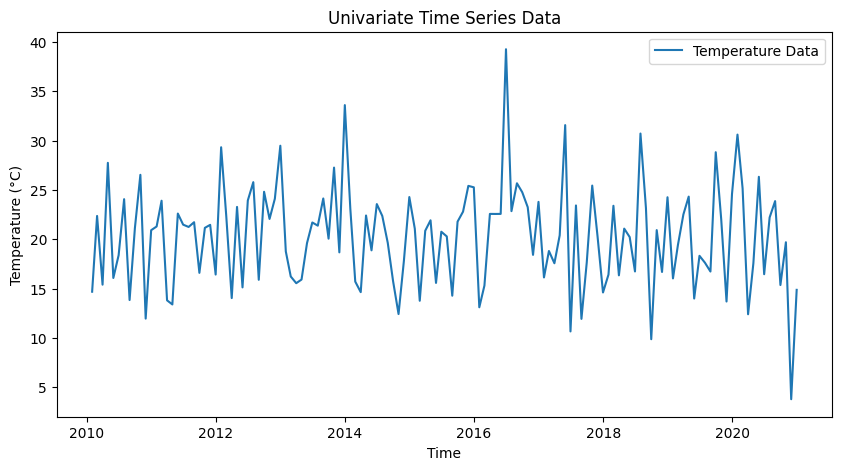

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Generate example univariate time series data
date_rng = pd.date_range(start='2010-01-01', end='2020-12-31', freq='M')
temperature_data = pd.Series(np.random.normal(20, 5, len(date_rng)), index=date_rng)

# Plotting the univariate time series data
plt.figure(figsize=(10, 5))
plt.plot(temperature_data, label='Temperature Data')
plt.title('Univariate Time Series Data')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

Multivariate Time Series Data

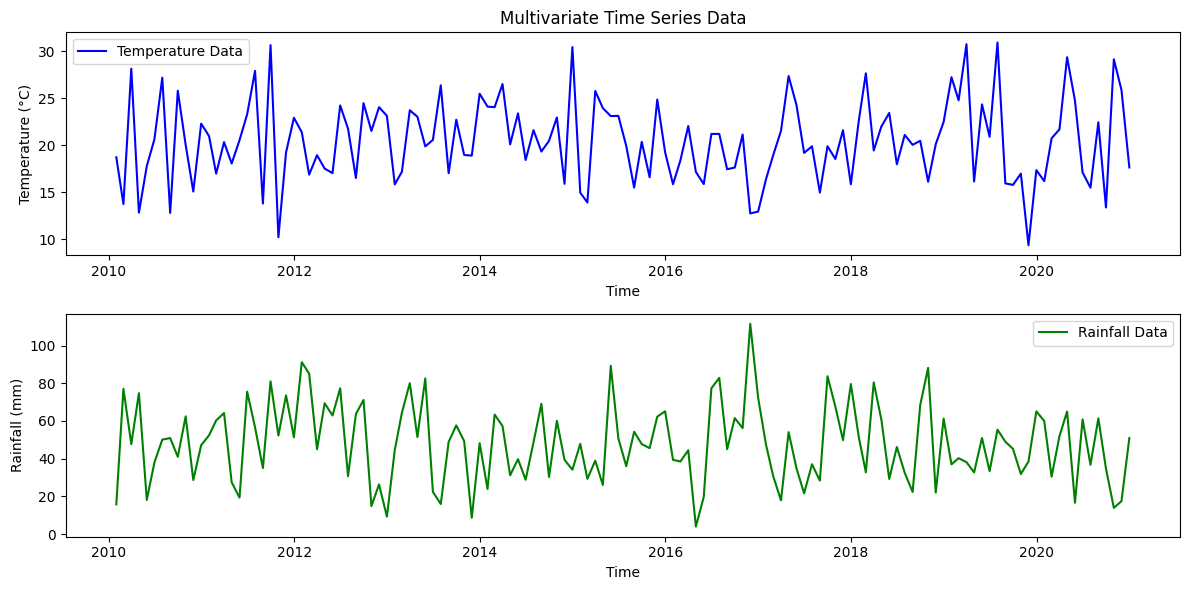

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Generate example multivariate time series data
date_rng = pd.date_range(start='2010-01-01', end='2020-12-31', freq='M')
temperature_data = pd.Series(np.random.normal(20, 5, len(date_rng)), index=date_rng)
rainfall_data = pd.Series(np.random.normal(50, 20, len(date_rng)), index=date_rng)

# Create a DataFrame with both temperature and rainfall data
multivariate_data = pd.DataFrame({'Temperature': temperature_data, 'Rainfall': rainfall_data})

# Plotting the multivariate time series data
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(multivariate_data['Temperature'], label='Temperature Data', color='blue')
plt.title('Multivariate Time Series Data')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(multivariate_data['Rainfall'], label='Rainfall Data', color='green')
plt.xlabel('Time')
plt.ylabel('Rainfall (mm)')
plt.legend()

plt.tight_layout()
plt.show()

Identify Missing Values in Time Series

Initial DataFrame with Missing Values and Timestamps:
                   open        high        low       close
2020-01-01  137.454012  262.589138  55.273685  183.849183
2020-01-02  195.071431  288.597775  82.839005  180.509032
2020-01-03  173.199394  261.586319  91.105158  182.298381
2020-01-06  159.865848  223.295947  69.021000  193.271051
2020-01-07         NaN         NaN        NaN         NaN

Missing Values in Each Column:
 open     97
high     97
low      97
close    97
dtype: int64

Missing Timestamps:
             open  high  low  close
2020-01-07   NaN   NaN  NaN    NaN
2020-01-15   NaN   NaN  NaN    NaN
2020-01-31   NaN   NaN  NaN    NaN
2020-02-13   NaN   NaN  NaN    NaN
2020-03-10   NaN   NaN  NaN    NaN
...          ...   ...  ...    ...
2023-11-09   NaN   NaN  NaN    NaN
2023-12-06   NaN   NaN  NaN    NaN
2023-12-07   NaN   NaN  NaN    NaN
2023-12-14   NaN   NaN  NaN    NaN
2023-12-18   NaN   NaN  NaN    NaN

[147 rows x 4 columns]

Percentage of Missing Timestamps: 14

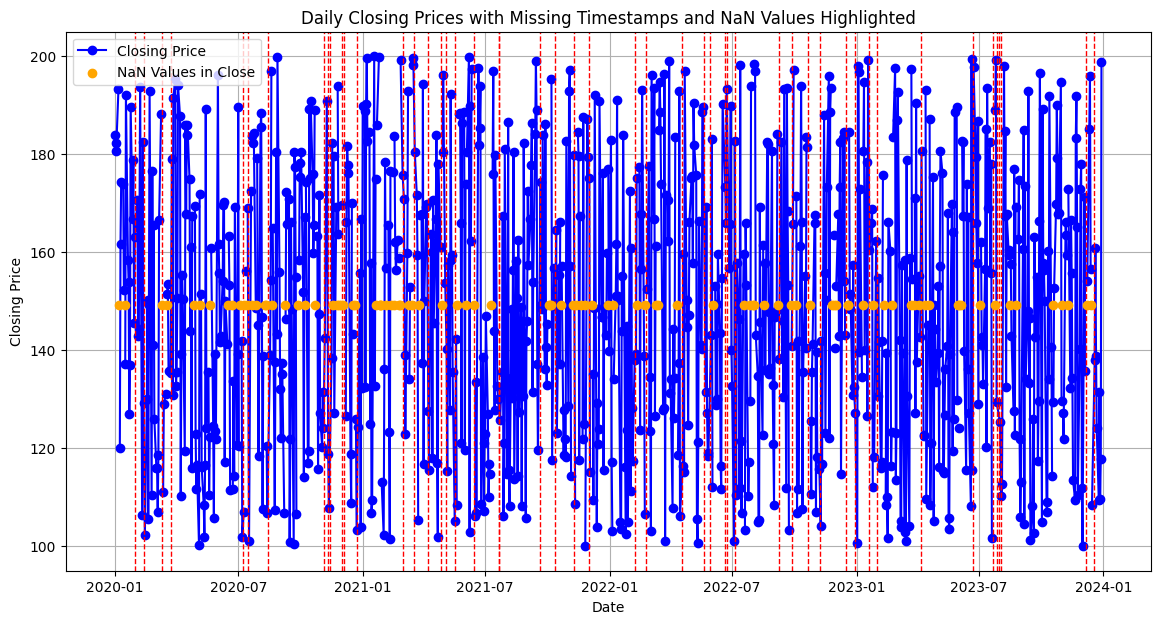


NaN values were introduced randomly in the dataset and are highlighted in orange on the plot.
Red dashed lines indicate missing timestamps where no data is available for the dates in the index.
Blue line shows the closing prices with missing values removed.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate a date range
date_range = pd.date_range(start='2020-01-01', end='2023-12-31', freq='B')  # Business days

# Generate random stock prices
n = len(date_range)
data = {
    'open': np.random.uniform(100, 200, n),
    'high': np.random.uniform(200, 300, n),
    'low': np.random.uniform(50, 100, n),
    'close': np.random.uniform(100, 200, n)
}

# Create DataFrame
df = pd.DataFrame(data, index=date_range)

# Introduce random NaN values
nan_indices = np.random.choice(df.index, size=100, replace=False)
df.loc[nan_indices] = np.nan

# Drop random dates to simulate missing timestamps
missing_dates = np.random.choice(df.index, size=50, replace=False)
df = df.drop(missing_dates)

# Display the first few rows of the DataFrame
print("Initial DataFrame with Missing Values and Timestamps:\n", df.head())

# Step 1: Checking for NaNs or Null Values in columns
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:\n", missing_values)

# Step 2: Identifying Missing Timestamps
complete_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='B')  # 'B' is for business days
df_reindexed = df.reindex(complete_index)
missing_timestamps = df_reindexed[df_reindexed.isnull().all(axis=1)]

# Calculate percentage of missing timestamps
total_timestamps = len(complete_index)
missing_timestamps_count = missing_timestamps.shape[0]
missing_timestamps_percentage = (missing_timestamps_count / total_timestamps) * 100

print("\nMissing Timestamps:\n", missing_timestamps)
print(f"\nPercentage of Missing Timestamps: {missing_timestamps_percentage:.2f}%")

# Plotting
plt.figure(figsize=(14, 7))

# Plot the closing prices
plt.plot(df.index, df['close'], marker='o', linestyle='-', label='Closing Price', color='blue')

# Mark missing timestamps with vertical lines
for date in missing_dates:
    plt.axvline(x=date, color='red', linestyle='--', linewidth=1)

# Highlight points with NaN values
nan_dates = df.index[df['close'].isnull()]
plt.scatter(nan_dates, [df['close'].mean()] * len(nan_dates), color='orange', label='NaN Values in Close', zorder=5)

plt.title('Daily Closing Prices with Missing Timestamps and NaN Values Highlighted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

# Summary of Identifying Missing Values
print("\nNaN values were introduced randomly in the dataset and are highlighted in orange on the plot.\n"
      "Red dashed lines indicate missing timestamps where no data is available for the dates in the index.\n"
      "Blue line shows the closing prices with missing values removed.")

Remove Missing Data from Time Series

Initial DataFrame with Missing Values:
                   open        high        low       close
2020-01-01  137.454012  262.589138  55.273685  183.849183
2020-01-02  195.071431  288.597775  82.839005  180.509032
2020-01-03  173.199394  261.586319  91.105158  182.298381
2020-01-06  159.865848  223.295947  69.021000  193.271051
2020-01-07  115.601864  202.440078  88.780593         NaN

Missing Values in Each Column:
 open     50
high      0
low       0
close    50
dtype: int64

Percentage of Missing Values in Each Column:
 open     4.793864
high     0.000000
low      0.000000
close    4.793864
dtype: float64

Number of rows before dropping NaN values: 1043

Number of rows after dropping NaN values: 945

Percentage of Missing Values After Dropping Rows:
 open     0.0
high     0.0
low      0.0
close    0.0
dtype: float64


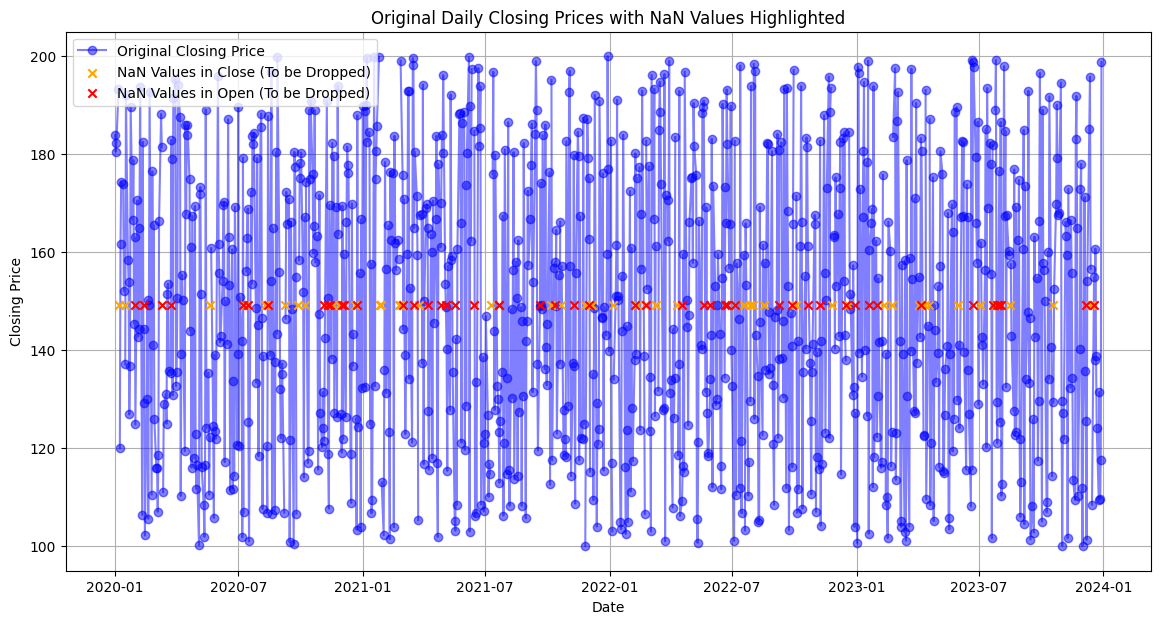

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

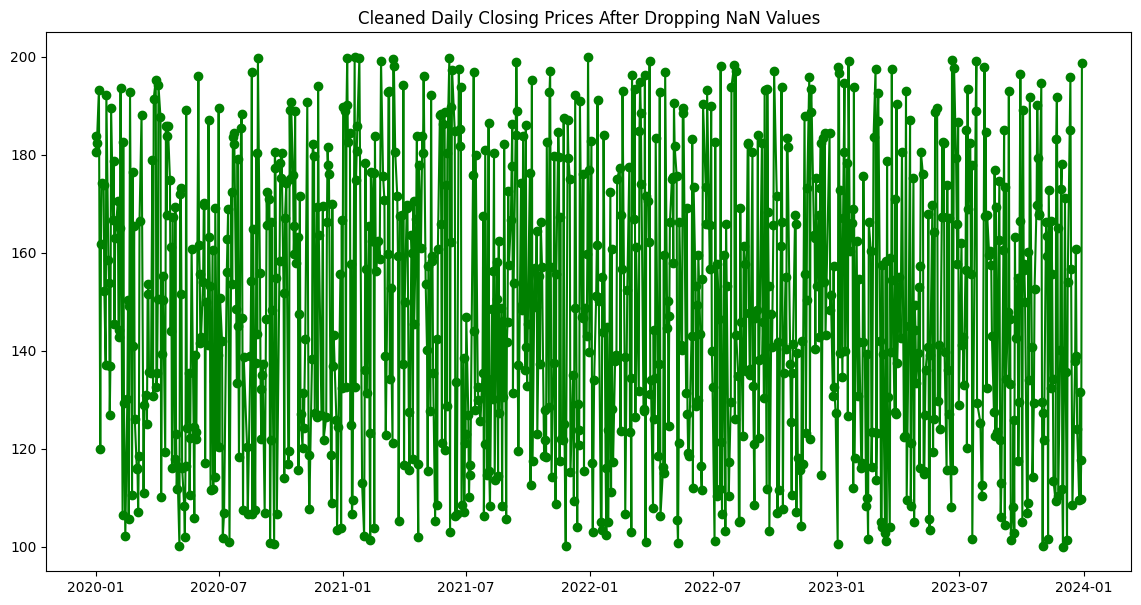

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate date range and random stock prices
date_range = pd.date_range(start='2020-01-01', end='2023-12-31', freq='B')
n = len(date_range)
data = {
    'open': np.random.uniform(100, 200, n),
    'high': np.random.uniform(200, 300, n),
    'low': np.random.uniform(50, 100, n),
    'close': np.random.uniform(100, 200, n)
}
df = pd.DataFrame(data, index=date_range)

# Introduce random NaN values in 'close' and 'open' columns
nan_indices_close = np.random.choice(df.index, size=50, replace=False)
nan_indices_open = np.random.choice(df.index, size=50, replace=False)
df.loc[nan_indices_close, 'close'] = np.nan
df.loc[nan_indices_open, 'open'] = np.nan

# Display the first few rows of the DataFrame
print("Initial DataFrame with Missing Values:\n", df.head())

# Step 1: Checking for NaNs or Null Values in columns
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:\n", missing_values)

# Print percentage of missing values in each column
missing_percentage = (missing_values / len(df)) * 100
print("\nPercentage of Missing Values in Each Column:\n", missing_percentage)

# Print the number of rows before dropping NaN values
print(f"\nNumber of rows before dropping NaN values: {len(df)}")

# Step 2: Drop rows with NaN values
df_cleaned = df.dropna()

# Print the number of rows after dropping NaN values
print(f"\nNumber of rows after dropping NaN values: {len(df_cleaned)}")

# Print percentage of missing values after dropping NaN values
cleaned_missing_values = df_cleaned.isnull().sum()
cleaned_missing_percentage = (cleaned_missing_values / len(df_cleaned)) * 100
print("\nPercentage of Missing Values After Dropping Rows:\n", cleaned_missing_percentage)

# Plotting original data with NaN values
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], marker='o', linestyle='-', label='Original Closing Price', color='blue', alpha=0.5)

# Highlight points with NaN values in the original dataset
nan_dates_close = df.index[df['close'].isnull()]
nan_dates_open = df.index[df['open'].isnull()]

# Use 'x' marker for the points to be dropped
plt.scatter(nan_dates_close, [df['close'].mean()] * len(nan_dates_close), color='orange', label='NaN Values in Close (To be Dropped)', marker='x', zorder=5)
plt.scatter(nan_dates_open, [df['close'].mean()] * len(nan_dates_open), color='red', label='NaN Values in Open (To be Dropped)', marker='x', zorder=5)

plt.title('Original Daily Closing Prices with NaN Values Highlighted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

# Plotting cleaned data after dropping rows with NaN values
plt.figure(figsize=(14, 7))
plt.plot(df_cleaned.index, df_cleaned['close'], marker='o', linestyle='-', label='Cleaned Closing Price', color='green')

plt.title('Cleaned Daily Closing Prices After Dropping NaN Values')
plt

Back Forward Filling

In [9]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Generate date range and random stock prices
date_range = pd.date_range(start='2020-01-01', end='2023-12-31', freq='B')
n = len(date_range)
data = {
    'open': np.random.uniform(100, 200, n),
    'high': np.random.uniform(200, 300, n),
    'low': np.random.uniform(50, 100, n),
    'close': np.random.uniform(100, 200, n)
}
df = pd.DataFrame(data, index=date_range)

# Introduce random NaN values in 'close' and 'open' columns
nan_indices_close = np.random.choice(df.index, size=50, replace=False)
nan_indices_open = np.random.choice(df.index, size=50, replace=False)
df.loc[nan_indices_close, 'close'] = np.nan
df.loc[nan_indices_open, 'open'] = np.nan

# Fill NaN values using forward fill and backward fill
df['close_ffill'] = df['close'].ffill()  # Forward Fill
df['close_bfill'] = df['close'].bfill()  # Backward Fill

# Display the entire DataFrame including original and filled values
print("Complete DataFrame with Original and Filled Values:\n")
print(df[['open', 'close', 'close_ffill', 'close_bfill']].head(20))  # Show first 20 rows

Complete DataFrame with Original and Filled Values:

                  open       close  close_ffill  close_bfill
2020-01-01  137.454012  183.849183   183.849183   183.849183
2020-01-02  195.071431  180.509032   180.509032   180.509032
2020-01-03  173.199394  182.298381   182.298381   182.298381
2020-01-06  159.865848  193.271051   193.271051   193.271051
2020-01-07  115.601864         NaN   193.271051   120.028202
2020-01-08  115.599452  120.028202   120.028202   120.028202
2020-01-09  105.808361  161.678361   161.678361   161.678361
2020-01-10  186.617615  174.288149   174.288149   174.288149
2020-01-13  160.111501  173.791739   173.791739   173.791739
2020-01-14  170.807258  152.144902   152.144902   152.144902
2020-01-15  102.058449         NaN   152.144902   137.111294
2020-01-16  196.990985  137.111294   137.111294   137.111294
2020-01-17  183.244264  192.076661   192.076661   192.076661
2020-01-20  121.233911  158.444891   158.444891   158.444891
2020-01-21  118.182497  153.8331

Interpolation

                  open        high        low       close  close_linear  \
2020-01-01  137.454012  262.589138  55.273685  183.849183    183.849183   
2020-01-02  195.071431  288.597775  82.839005  180.509032    180.509032   
2020-01-03  173.199394  261.586319  91.105158  182.298381    182.298381   
2020-01-06  159.865848  223.295947  69.021000  193.271051    193.271051   
2020-01-07  115.601864  202.440078  88.780593         NaN    156.649626   
2020-01-08  115.599452  287.009887  98.223833  120.028202    120.028202   
2020-01-09  105.808361  202.126941  60.188323  161.678361    161.678361   
2020-01-10  186.617615  287.470167  76.166482  174.288149    174.288149   
2020-01-13  160.111501  252.893713  64.356898  173.791739    173.791739   
2020-01-14  170.807258  293.906770  89.642721  152.144902    152.144902   
2020-01-15  102.058449  279.878324  78.879668         NaN    144.628098   
2020-01-16  196.990985  299.793411  81.729121  137.111294    137.111294   
2020-01-17  183.244264  2

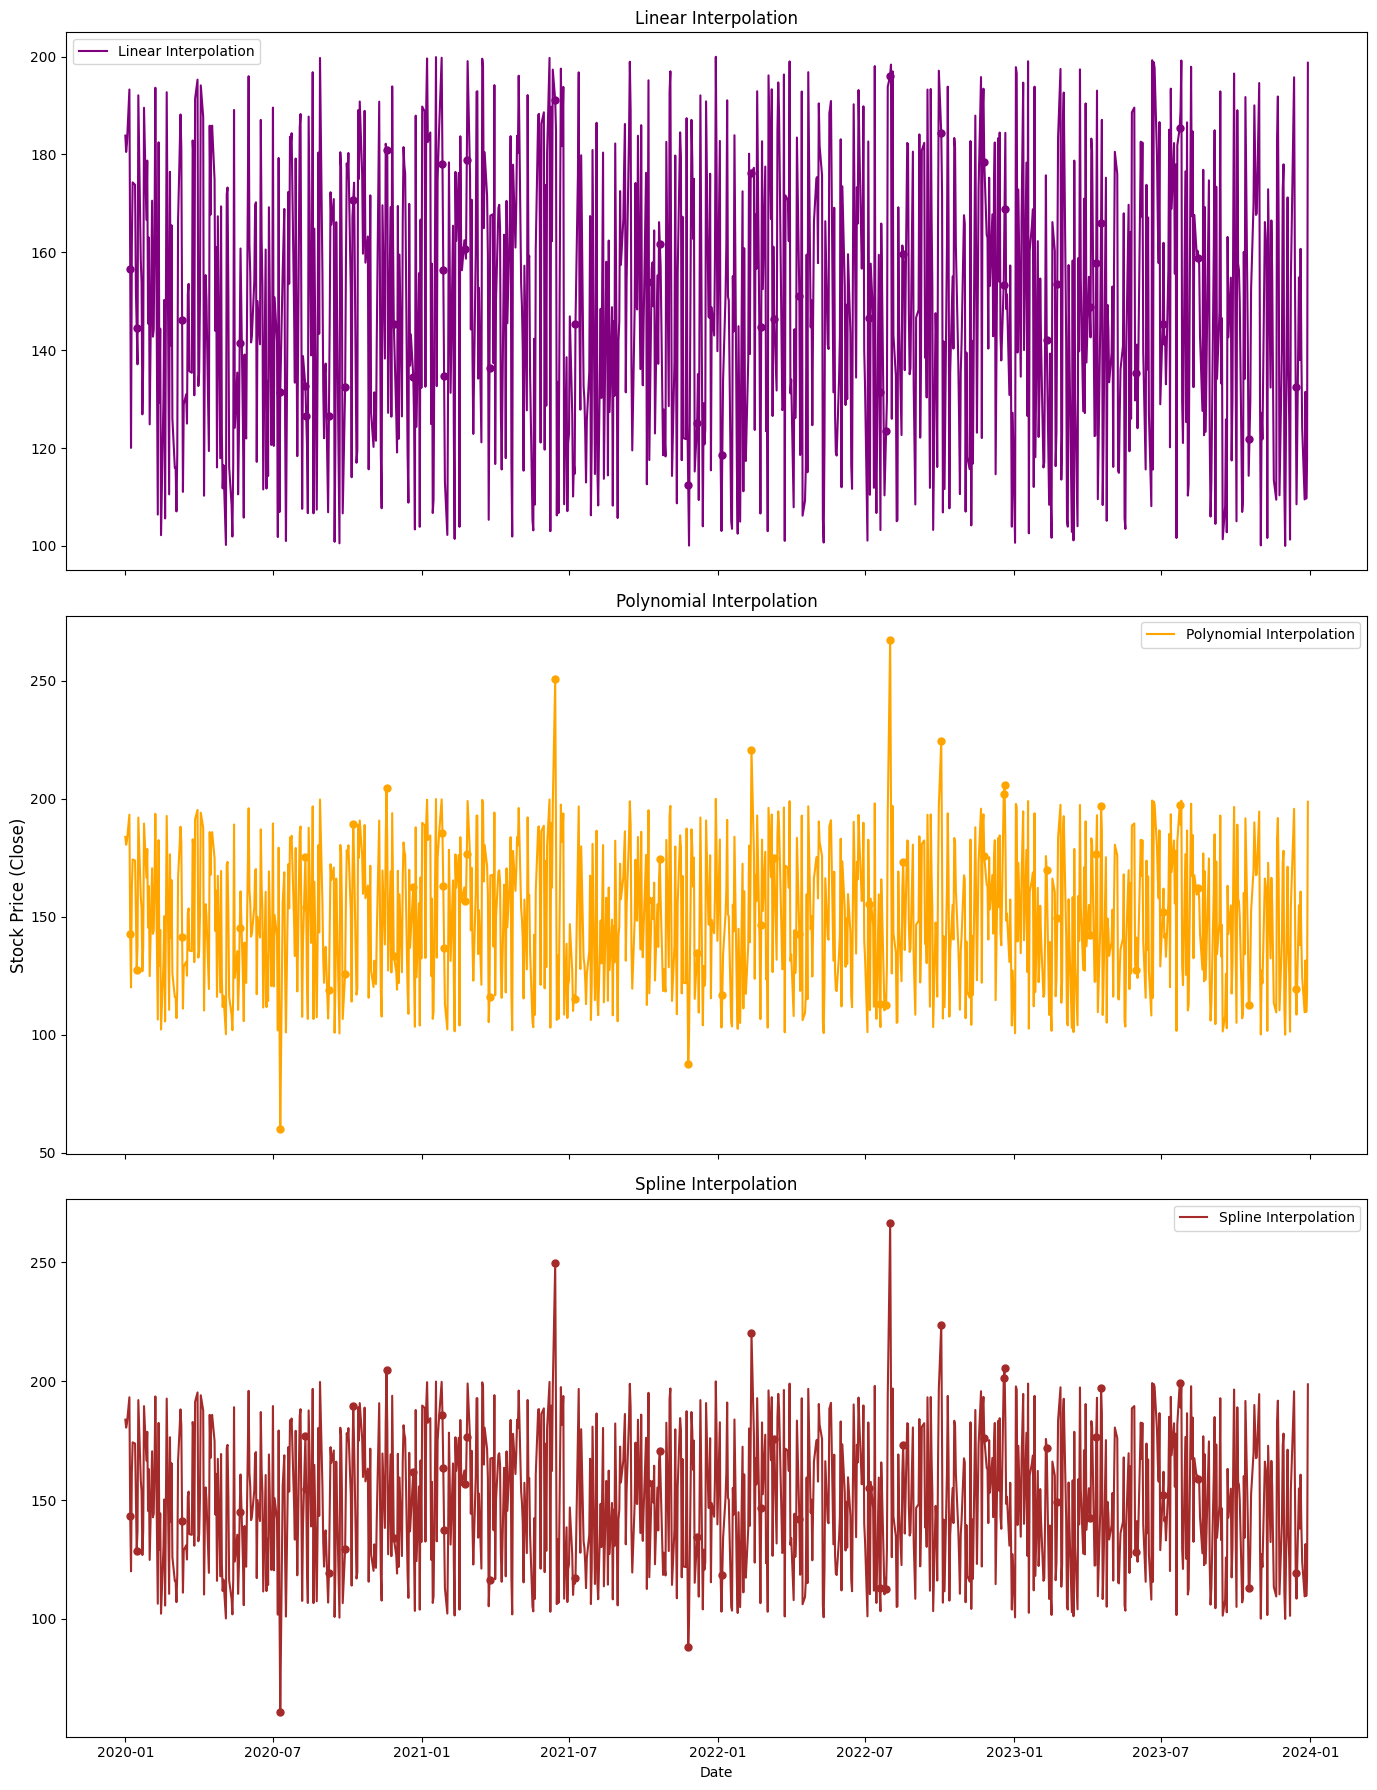

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate date range and random stock prices
date_range = pd.date_range(start='2020-01-01', end='2023-12-31', freq='B')
n = len(date_range)
data = {
    'open': np.random.uniform(100, 200, n),
    'high': np.random.uniform(200, 300, n),
    'low': np.random.uniform(50, 100, n),
    'close': np.random.uniform(100, 200, n)
}
df = pd.DataFrame(data, index=date_range)

# Introduce random NaN values in 'close' and 'open' columns
nan_indices_close = np.random.choice(df.index, size=50, replace=False)
nan_indices_open = np.random.choice(df.index, size=50, replace=False)
df.loc[nan_indices_close, 'close'] = np.nan
df.loc[nan_indices_open, 'open'] = np.nan

# Interpolation
# Linear Interpolation
df['close_linear'] = df['close'].interpolate(method='linear')

# Polynomial Interpolation
df['close_poly'] = df['close'].interpolate(method='polynomial', order=3)

# Spline Interpolation
df['close_spline'] = df['close'].interpolate(method='spline', order=3)

print(df.head(30))

# Function to plot and highlight filled values
def plot_filled(ax, original, filled, label, color):
    ax.plot(filled, label=label, linestyle='-', color=color)
    filled_values = filled[original.isna()]
    ax.plot(filled_values.index, filled_values, 'o', color=color, markersize=5)
    ax.legend()

# Plot the results in separate subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 18), sharex=True)


# Linear Interpolation
plot_filled(axes[0], df['close'], df['close_linear'], 'Linear Interpolation', 'purple')
axes[0].set_title('Linear Interpolation')

# Polynomial Interpolation
plot_filled(axes[1], df['close'], df['close_poly'], 'Polynomial Interpolation', 'orange')
axes[1].set_title('Polynomial Interpolation')

# Spline Interpolation
plot_filled(axes[2], df['close'], df['close_spline'], 'Spline Interpolation', 'brown')
axes[2].set_title('Spline Interpolation')

# Set common labels
plt.xlabel('Date')
fig.supylabel('Stock Price (Close)')

plt.tight_layout()
plt.show()

Autocorrelation

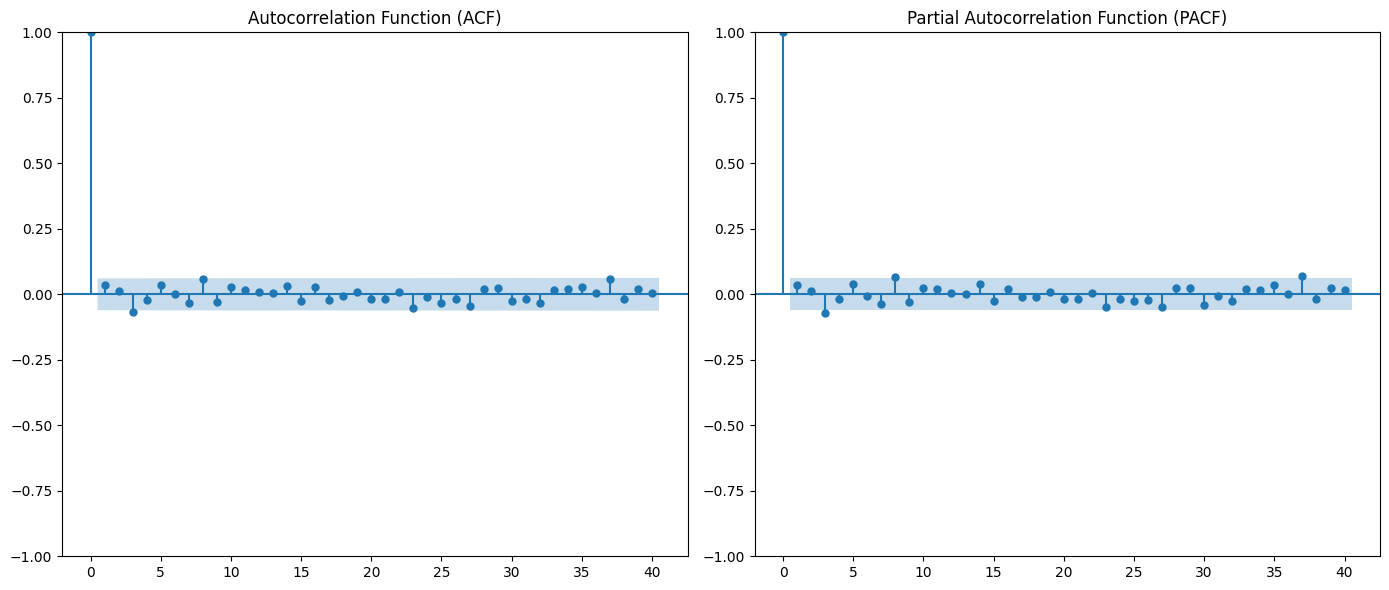

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Set seed for reproducibility
np.random.seed(42)

# Generate date range and random stock prices
date_range = pd.date_range(start='2020-01-01', end='2023-12-31', freq='B')
n = len(date_range)
data = {
    'open': np.random.uniform(100, 200, n),
    'high': np.random.uniform(200, 300, n),
    'low': np.random.uniform(50, 100, n),
    'close': np.random.uniform(100, 200, n)
}
df = pd.DataFrame(data, index=date_range)

# Plot ACF and PACF
plt.figure(figsize=(14, 6))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(df['close'].dropna(), lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(df['close'].dropna(), lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

Seasonal Decomposition

                 close       close       trend   seasonal   residual   resid_z
2020-01-01  183.849183  183.849183  146.351742   9.229125  28.268317  1.088995
2020-01-02  180.509032  180.509032  146.367165   1.849790  32.292077  1.244582
2020-01-03  182.298381  182.298381  146.382589   6.832658  29.083133  1.120501
2020-01-06  193.271051  193.271051  146.398013   8.801893  38.071145  1.468043
2020-01-07  154.425397  154.425397  146.413436  -8.351888  16.363848  0.628682
2020-01-08  120.028202  120.028202  146.428860 -16.741557  -9.659102 -0.377554
2020-01-09  161.678361  161.678361  146.444284   6.465091   8.768986  0.335010
2020-01-10  174.288149  174.288149  146.459707   3.880661  23.947782  0.921932
2020-01-13  173.791739  173.791739  146.475131  19.387879   7.928730  0.302519
2020-01-14  152.144902  152.144902  146.490555  -5.486037  11.140384  0.426705
2020-01-15  106.845872  106.845872  146.505978   4.755037 -44.415144 -1.721474
2020-01-16  137.111294  137.111294  146.521402   9.4

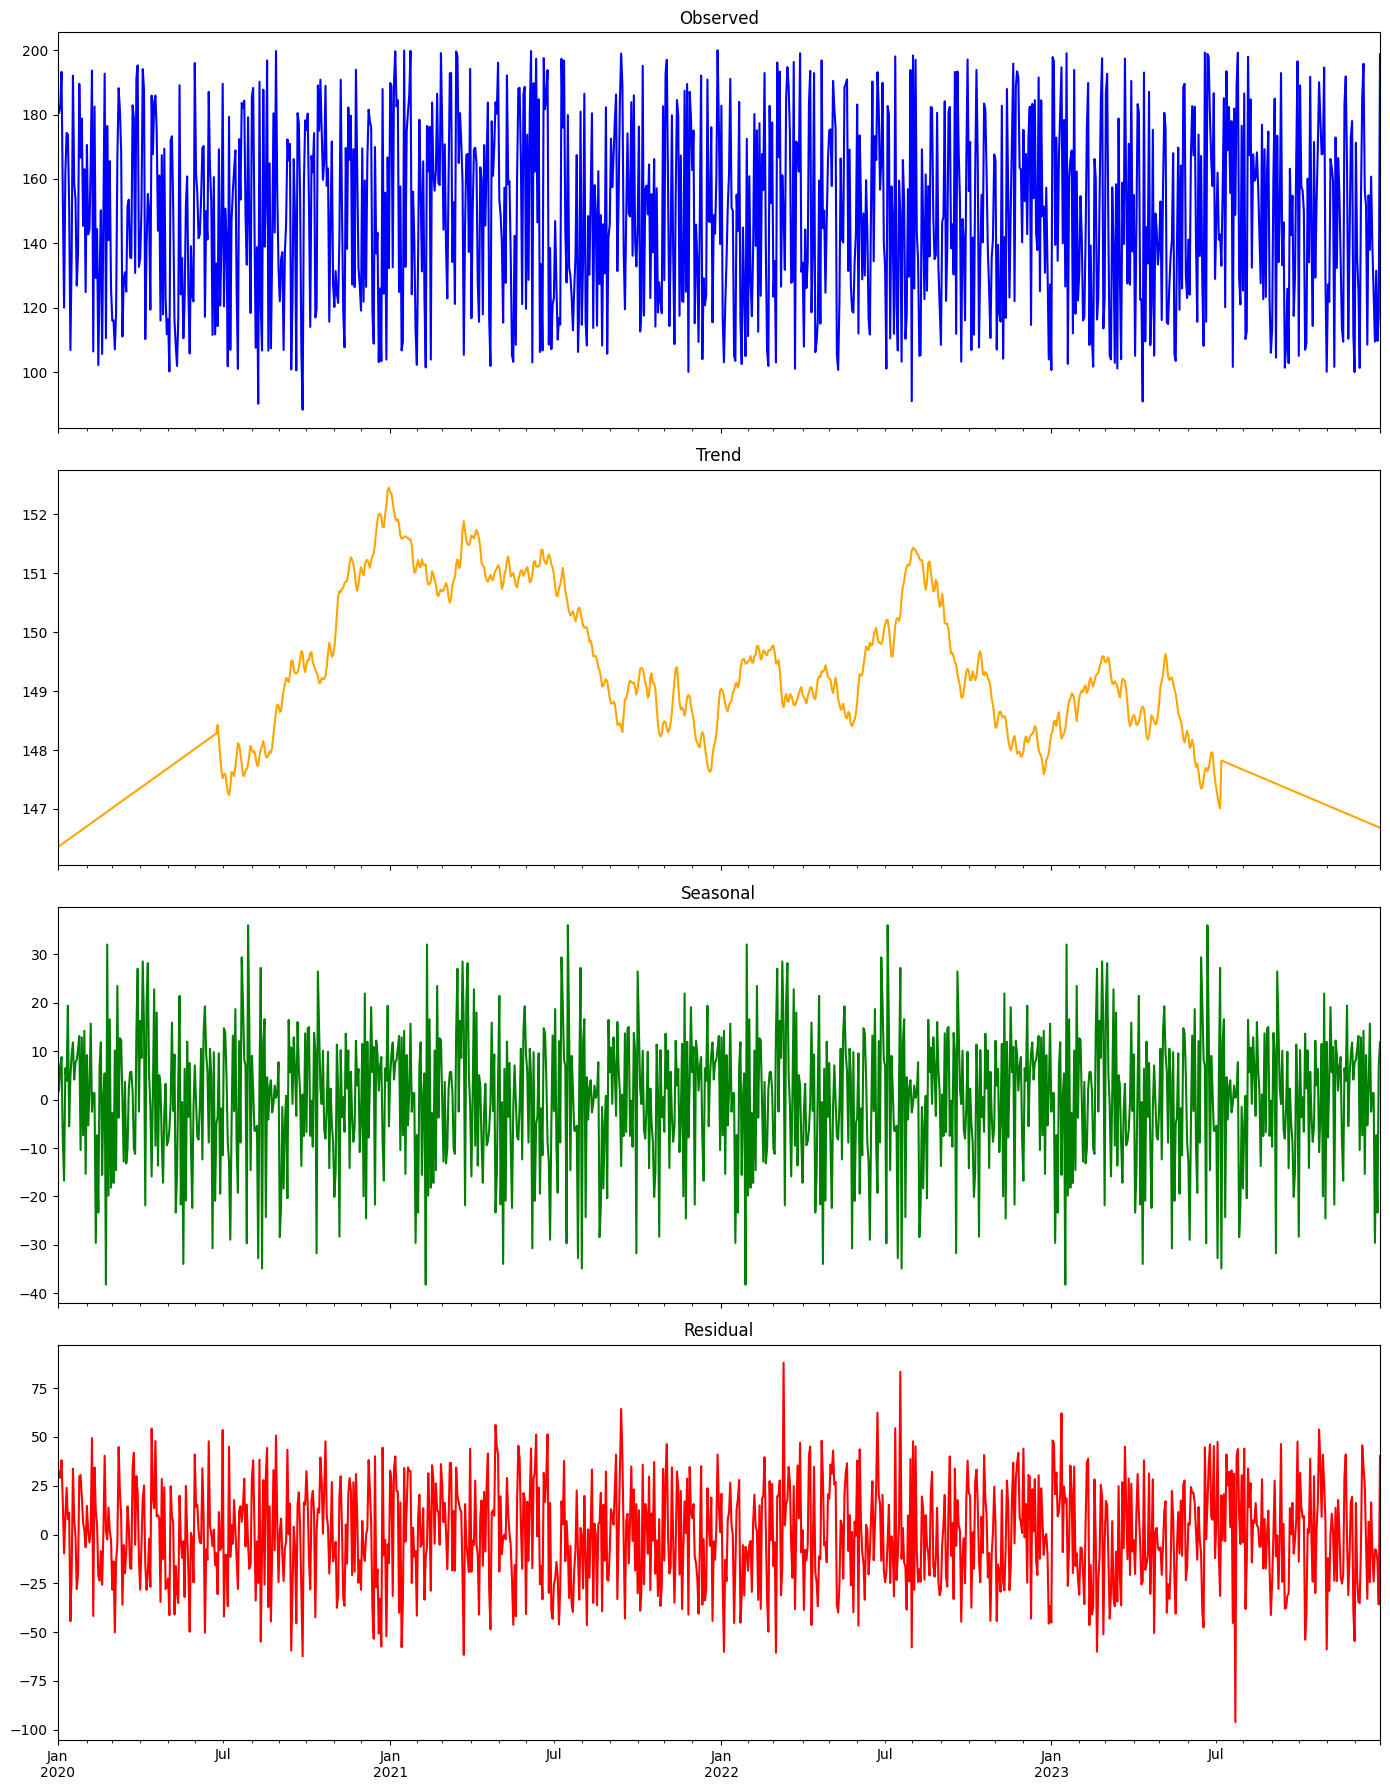

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import zscore

# Set seed for reproducibility
np.random.seed(42)

# Generate date range and random stock prices
date_range = pd.date_range(start='2020-01-01', end='2023-12-31', freq='B')
n = len(date_range)
data = {
    'open': np.random.uniform(100, 200, n),
    'high': np.random.uniform(200, 300, n),
    'low': np.random.uniform(50, 100, n),
    'close': np.random.uniform(100, 200, n)
}
df = pd.DataFrame(data, index=date_range)


# Introduce more aggressive outliers in the 'close' column
outlier_indices = np.random.choice(df.index, size=10, replace=False)
df.loc[outlier_indices[:5], 'close'] = df['close'] * 1.5  # Increase by 50%
df.loc[outlier_indices[5:], 'close'] = df['close'] * 0.5  # Decrease by 50%

# Decompose the series
result = seasonal_decompose(df['close'], model='additive', period=252, extrapolate_trend='freq')

# Add decomposed components to DataFrame
df['trend'] = result.trend
df['seasonal'] = result.seasonal
df['residual'] = result.resid

# Calculate Z-scores of residuals to identify outliers
df['resid_z'] = zscore(df['residual'].dropna())

# Identify outliers (Z-score threshold set to 3)
outliers = df[np.abs(df['resid_z']) > 3]

# Handling outliers by replacing them with the median of the residuals
median_resid = df['residual'].median()
df.loc[outliers.index, 'close'] = df['close'].median()

# Print the DataFrame to understand the numbers
print(df[['close', 'close', 'trend', 'seasonal', 'residual', 'resid_z']].head(20))

# Plot the decomposed components
fig, axes = plt.subplots(4, 1, figsize=(14, 18), sharex=True)

result.observed.plot(ax=axes[0], title='Observed', color='blue')
result.trend.plot(ax=axes[1], title='Trend', color='orange')
result.seasonal.plot(ax=axes[2], title='Seasonal', color='green')
result.resid.plot(ax=axes[3], title='Residual', color='red')

plt.tight_layout()
plt.show()

Arima

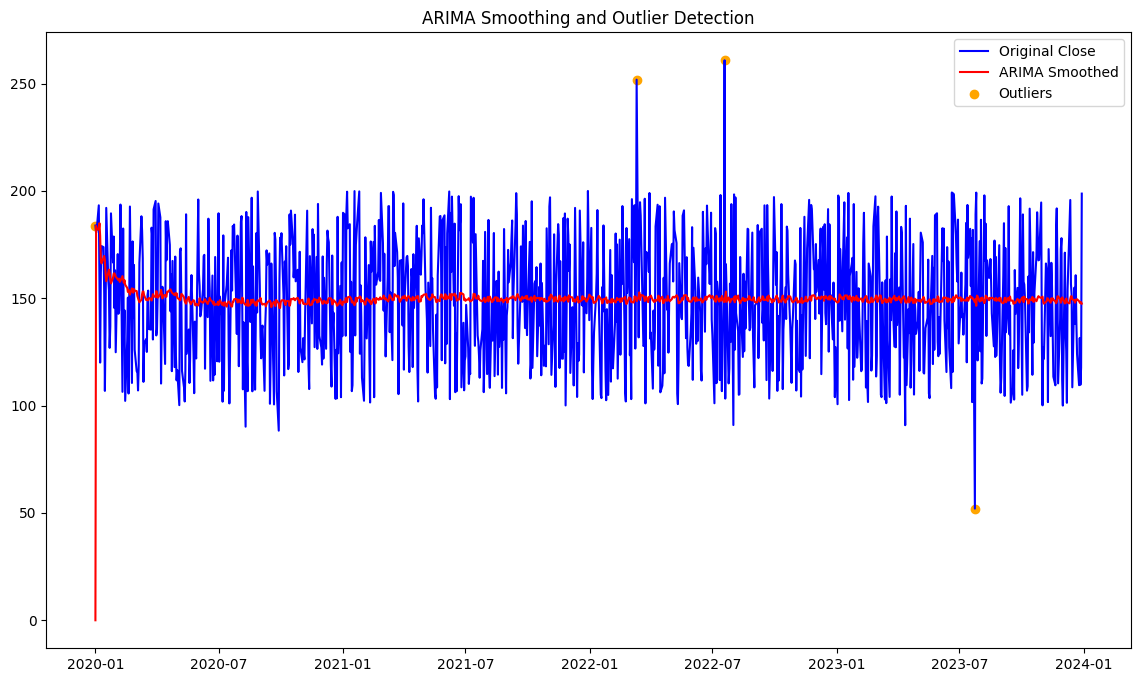

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1043
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -5000.538
Date:                Wed, 28 Aug 2024   AIC                          10009.076
Time:                        13:24:31   BIC                          10028.872
Sample:                    01-01-2020   HQIC                         10016.585
                         - 12-29-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0085      0.031      0.276      0.783      -0.052       0.069
ar.L2          0.0337      0.032      1.055      0.292      -0.029       0.096
ma.L1         -0.9999      0.154     -6.505      0.0

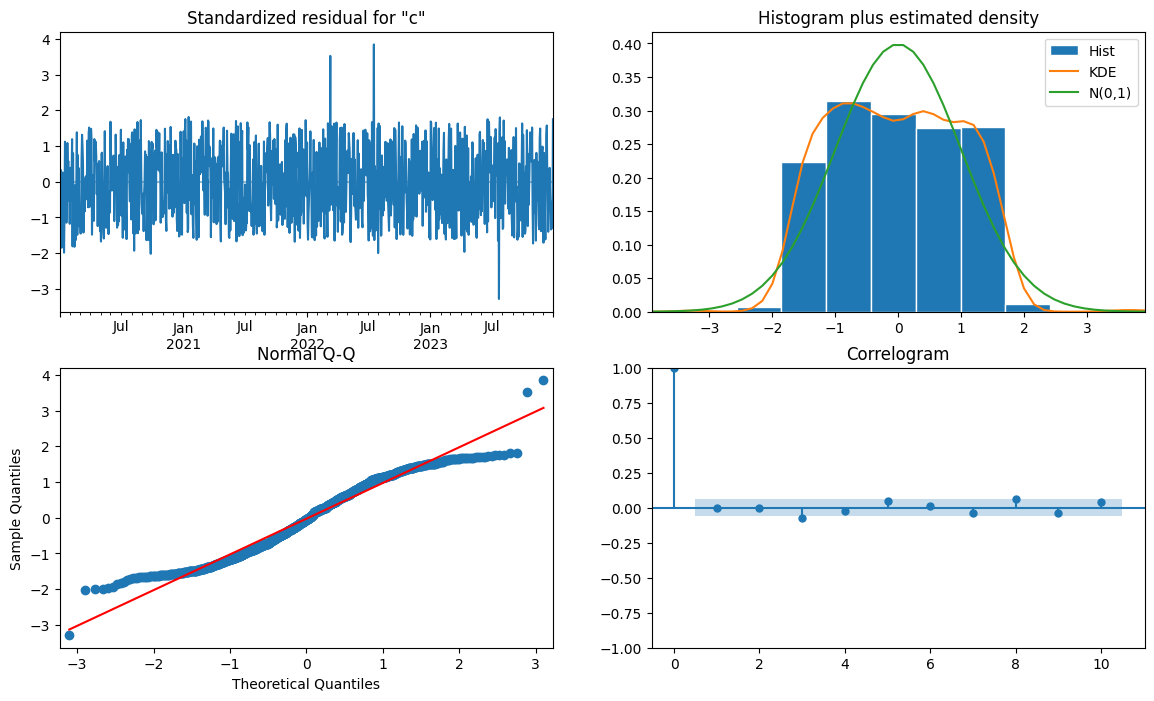

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import zscore

# Set seed for reproducibility
np.random.seed(42)

# Generate date range and random stock prices
date_range = pd.date_range(start='2020-01-01', end='2023-12-31', freq='B')
n = len(date_range)
data = {
    'open': np.random.uniform(100, 200, n),
    'high': np.random.uniform(200, 300, n),
    'low': np.random.uniform(50, 100, n),
    'close': np.random.uniform(100, 200, n)
}
df = pd.DataFrame(data, index=date_range)


# Introduce more aggressive outliers in the 'close' column
outlier_indices = np.random.choice(df.index, size=10, replace=False)
df.loc[outlier_indices[:5], 'close'] = df['close'] * 1.5  # Increase by 50%
df.loc[outlier_indices[5:], 'close'] = df['close'] * 0.5  # Decrease by 50%


# Fit ARIMA model to close_filled series
model = ARIMA(df['close'], order=(2, 1, 1))
results = model.fit()

# Calculate residuals and Z-scores
df['residuals'] = results.resid
df['residuals_z'] = zscore(df['residuals'].dropna())

# Identify outliers based on Z-score threshold (e.g., ±3)
outliers_arima = df[np.abs(df['residuals_z']) > 3]

# Generate smoothed series from ARIMA model
df['arima_smooth'] = results.fittedvalues

# Plotting the original close_filled and ARIMA smoothed series
plt.figure(figsize=(14, 8))
plt.plot(df['close'], label='Original Close', color='blue')
plt.plot(df['arima_smooth'], label='ARIMA Smoothed', color='red')
plt.scatter(outliers_arima.index, df.loc[outliers_arima.index, 'close'], color='orange', label='Outliers')
plt.title('ARIMA Smoothing and Outlier Detection')
plt.legend()
plt.show()

# Print the summary of the model
print(results.summary())

# Plot the diagnostics to check model fit
results.plot_diagnostics(figsize=(14, 8))
plt.show()

Moving Averages

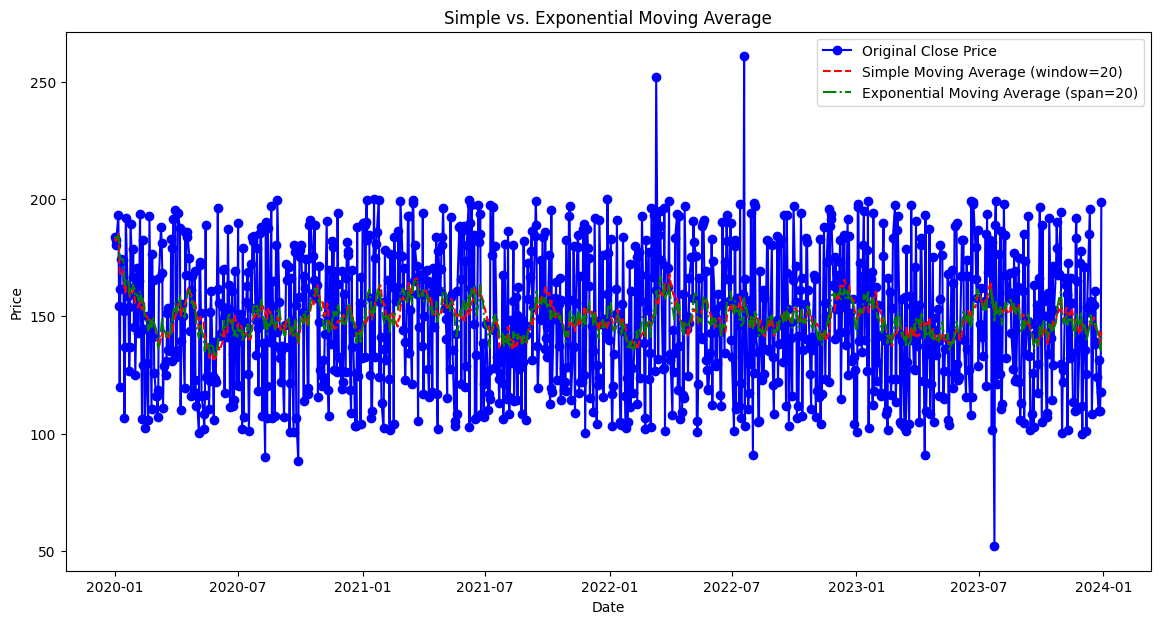

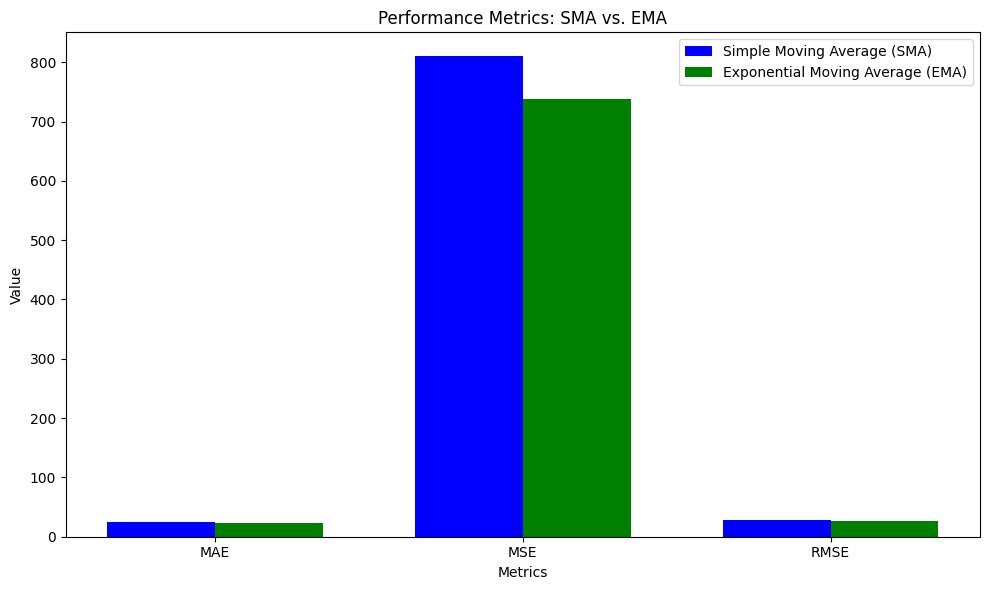

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Set seed for reproducibility
np.random.seed(42)

# Generate date range and random stock prices
date_range = pd.date_range(start='2020-01-01', end='2023-12-31', freq='B')
n = len(date_range)
data = {
    'open': np.random.uniform(100, 200, n),
    'high': np.random.uniform(200, 300, n),
    'low': np.random.uniform(50, 100, n),
    'close': np.random.uniform(100, 200, n)
}
df = pd.DataFrame(data, index=date_range)

# Introduce more aggressive outliers in the 'close' column
outlier_indices = np.random.choice(df.index, size=10, replace=False)
df.loc[outlier_indices[:5], 'close'] = df['close'] * 1.5  # Increase by 50%
df.loc[outlier_indices[5:], 'close'] = df['close'] * 0.5  # Decrease by 50%

# Define window size for SMA and span for EMA
window_size = 20
span = 20

# Calculate Simple Moving Average (SMA)
df['SMA'] = df['close'].rolling(window=window_size, min_periods=1).mean()

# Calculate Exponential Moving Average (EMA)
df['EMA'] = df['close'].ewm(span=span, adjust=False).mean()

# Calculate residuals for SMA and EMA
df['SMA_residuals'] = df['close'] - df['SMA']
df['EMA_residuals'] = df['close'] - df['EMA']

# Performance Metrics Calculation
sma_mae = mean_absolute_error(df['close'], df['SMA'])
sma_mse = mean_squared_error(df['close'], df['SMA'])
sma_rmse = np.sqrt(sma_mse)

ema_mae = mean_absolute_error(df['close'], df['EMA'])
ema_mse = mean_squared_error(df['close'], df['EMA'])
ema_rmse = np.sqrt(ema_mse)

# Plotting original 'close', SMA, and EMA
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Original Close Price', marker='o', linestyle='-', color='b')
plt.plot(df.index, df['SMA'], label=f'Simple Moving Average (window={window_size})', linestyle='--', color='r')
plt.plot(df.index, df['EMA'], label=f'Exponential Moving Average (span={span})', linestyle='-.', color='g')
plt.title('Simple vs. Exponential Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plotting Performance Metrics
metrics = ['MAE', 'MSE', 'RMSE']
sma_values = [sma_mae, sma_mse, sma_rmse]
ema_values = [ema_mae, ema_mse, ema_rmse]

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(metrics))

plt.bar(index, sma_values, bar_width, label='Simple Moving Average (SMA)', color='b')
plt.bar(index + bar_width, ema_values, bar_width, label='Exponential Moving Average (EMA)', color='g')

plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Performance Metrics: SMA vs. EMA')
plt.xticks(index + bar_width / 2, metrics)
plt.legend()
plt.tight_layout()
plt.show()

Autocorrelation

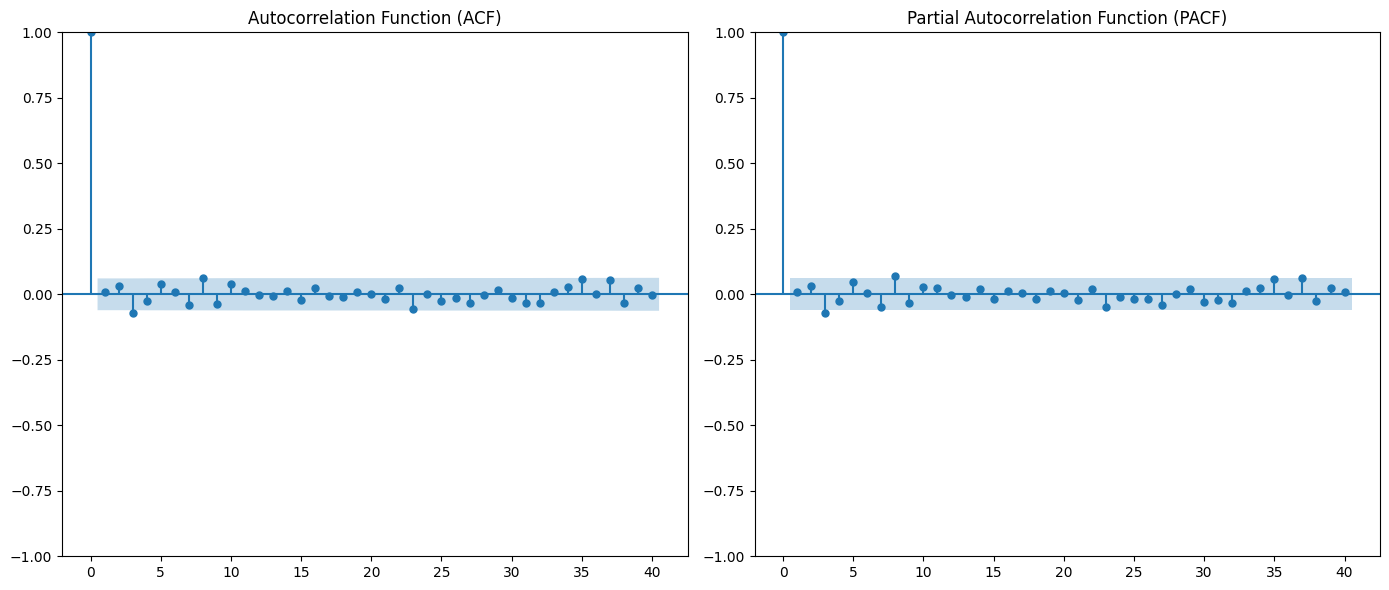

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Set seed for reproducibility
np.random.seed(42)

# Generate date range and random stock prices
date_range = pd.date_range(start='2020-01-01', end='2023-12-31', freq='B')
n = len(date_range)
data = {
    'open': np.random.uniform(100, 200, n),
    'high': np.random.uniform(200, 300, n),
    'low': np.random.uniform(50, 100, n),
    'close': np.random.uniform(100, 200, n)
}
df = pd.DataFrame(data, index=date_range)

# Introduce more aggressive outliers in the 'close' column
outlier_indices = np.random.choice(df.index, size=10, replace=False)
df.loc[outlier_indices[:5], 'close'] = df['close'] * 1.5  # Increase by 50%
df.loc[outlier_indices[5:], 'close'] = df['close'] * 0.5  # Decrease by 50%


# Plot ACF and PACF
plt.figure(figsize=(14, 6))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(df['close'].dropna(), lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(df['close'].dropna(), lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

Feature Engineering - Lag Feature

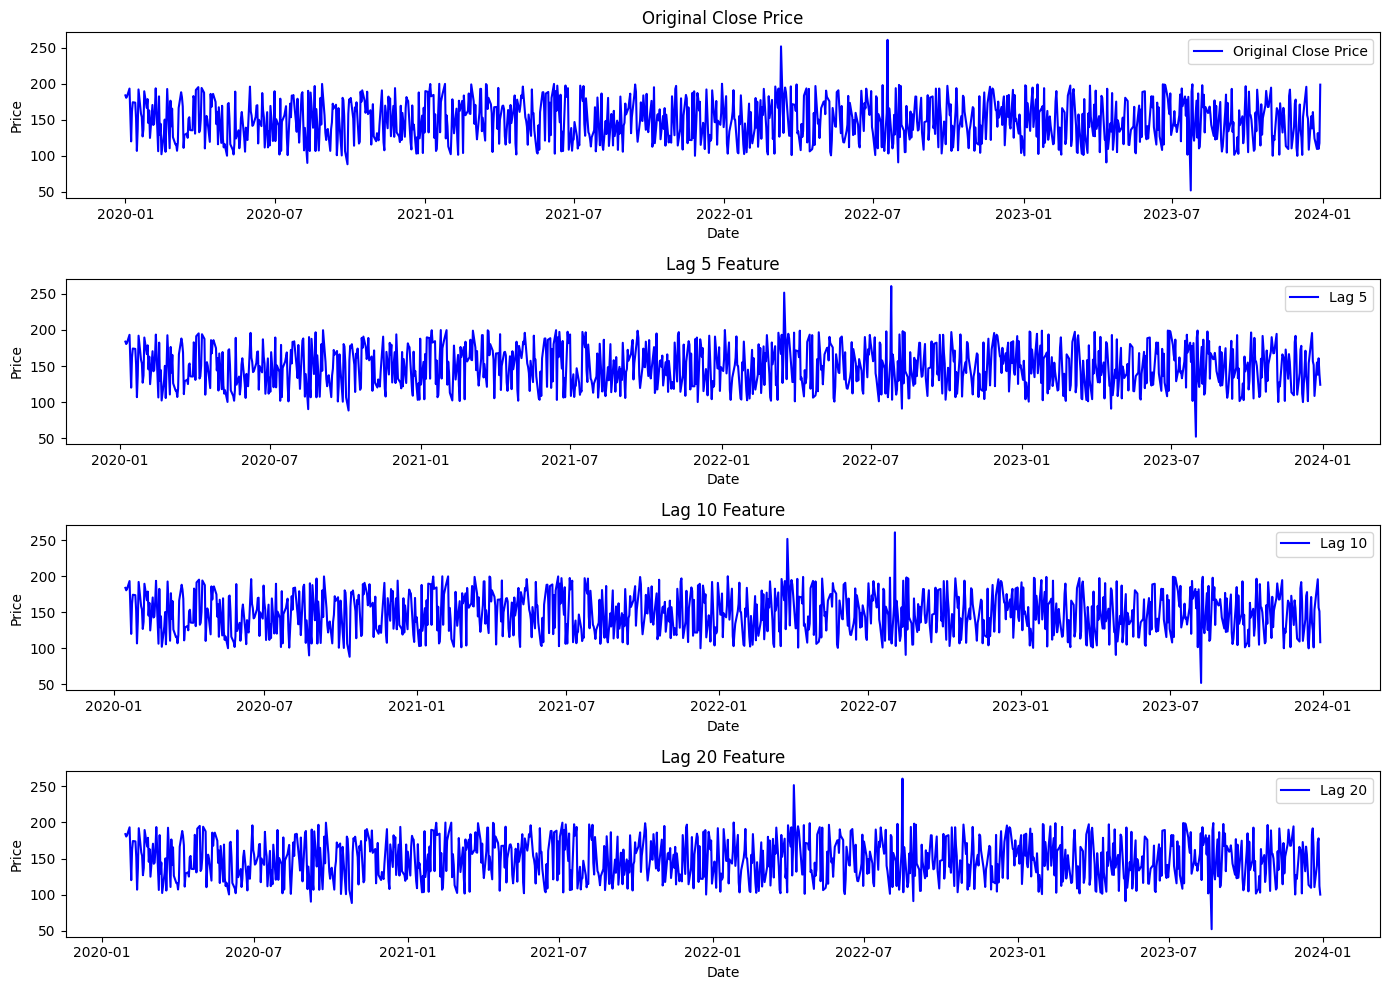

Explanation of Lagged Features:
- Lagged features, such as Lag 1, Lag 5, Lag 10, and Lag 20, represent historical values of the 'close' price.
- They capture temporal dependencies and autocorrelation present in the data.
- Lagged features are important for predicting future movements based on past behavior.
- They help in identifying trends, cycles, and seasonality in time series data.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Set seed for reproducibility
np.random.seed(42)

# Generate date range and random stock prices
date_range = pd.date_range(start='2020-01-01', end='2023-12-31', freq='B')
n = len(date_range)
data = {
    'open': np.random.uniform(100, 200, n),
    'high': np.random.uniform(200, 300, n),
    'low': np.random.uniform(50, 100, n),
    'close': np.random.uniform(100, 200, n)
}
df = pd.DataFrame(data, index=date_range)

# Introduce more aggressive outliers in the 'close' column
outlier_indices = np.random.choice(df.index, size=10, replace=False)
df.loc[outlier_indices[:5], 'close'] = df['close'] * 1.5  # Increase by 50%
df.loc[outlier_indices[5:], 'close'] = df['close'] * 0.5  # Decrease by 50%

# Function to create lagged features
def create_lagged_features(df, column, lags):
    for lag in lags:
        df[f'{column}_lag_{lag}'] = df[column].shift(lag)
    return df

# Define the lags to create
lags = [5, 10, 20]

# Create lagged features for 'close' column
df = create_lagged_features(df, 'close', lags)

# Plotting original 'close' and lagged features in separate subplots
plt.figure(figsize=(14, 10))

# First subplot for the original 'close' price
plt.subplot(len(lags) + 1, 1, 1)
plt.plot(df.index, df['close'], label='Original Close Price', linestyle='-', color='b')
plt.title('Original Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Create additional subplots for each lagged feature
for i, lag in enumerate(lags):
    plt.subplot(len(lags) + 1, 1, i + 2)
    plt.plot(df.index, df[f'close_lag_{lag}'], label=f'Lag {lag}', linestyle='-', color='b')
    plt.title(f'Lag {lag} Feature')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()

plt.tight_layout()  # Adjust spacing between plots
plt.show()

# Explanation of significance of lagged features
print("Explanation of Lagged Features:")
print("- Lagged features, such as Lag 1, Lag 5, Lag 10, and Lag 20, represent historical values of the 'close' price.")
print("- They capture temporal dependencies and autocorrelation present in the data.")
print("- Lagged features are important for predicting future movements based on past behavior.")
print("- They help in identifying trends, cycles, and seasonality in time series data.")

Seasonal Differencing

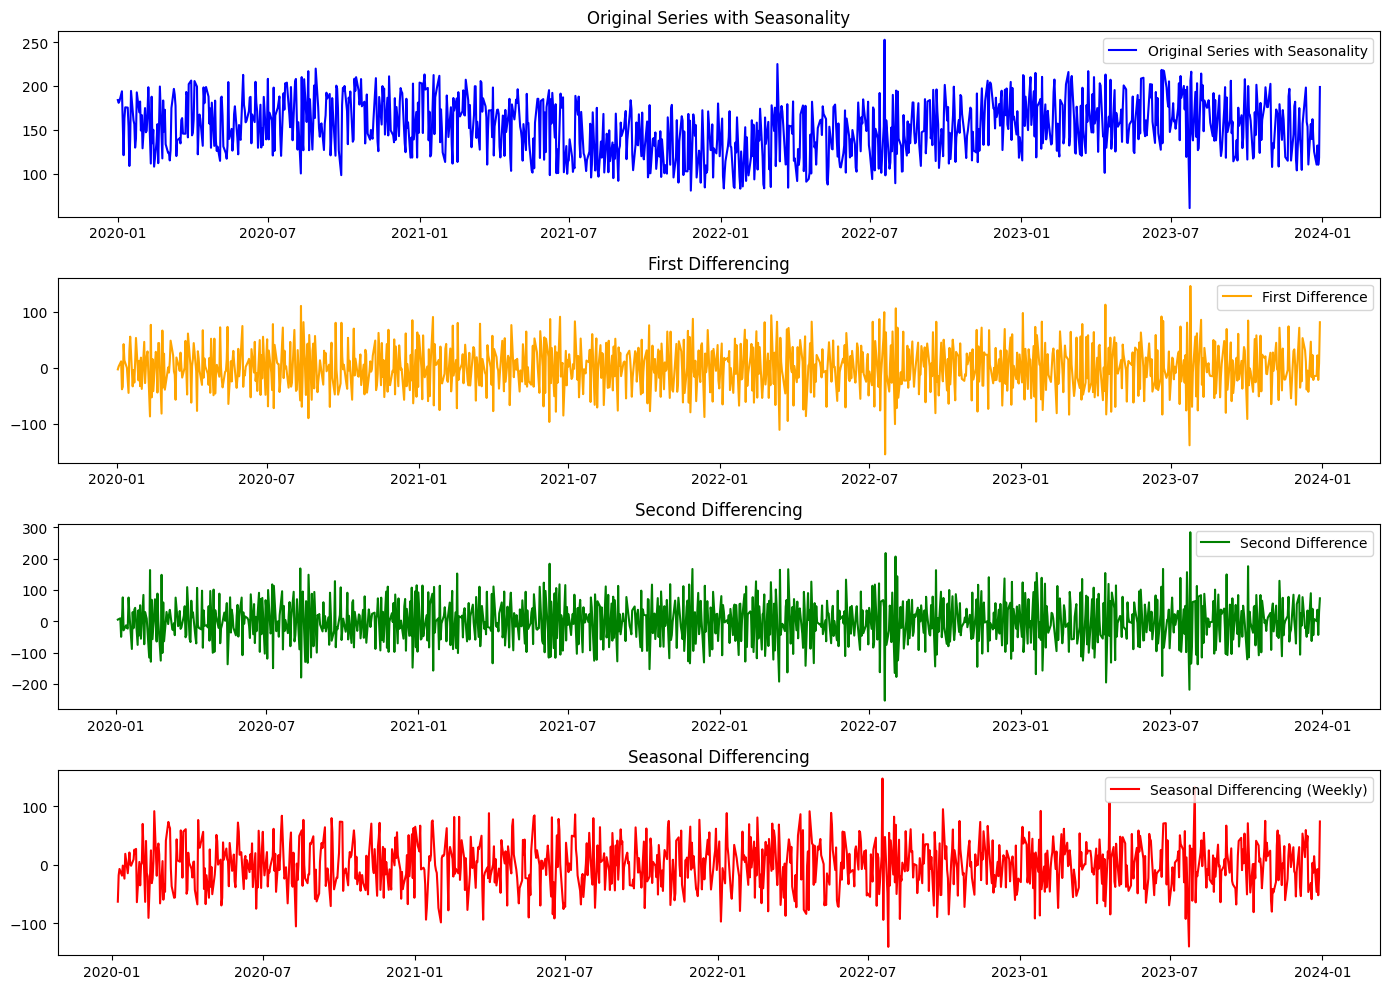

Augmented Dickey-Fuller Test: Original Series
ADF Statistic: -3.589855244598753
p-value: 0.005957961883734603
   1%: -3.4367333690404767
   5%: -2.8643583648001925
   10%: -2.568270618452702


Augmented Dickey-Fuller Test: First Difference
ADF Statistic: -11.786384523171428
p-value: 1.0064914317104574e-21
   1%: -3.4367709764382024
   5%: -2.8643749513463637
   10%: -2.568279452717228


Augmented Dickey-Fuller Test: Second Difference
ADF Statistic: -14.95687341689829
p-value: 1.256290507290022e-27
   1%: -3.4367899468008916
   5%: -2.8643833180472744
   10%: -2.5682839089705536


Augmented Dickey-Fuller Test: Seasonal Differencing
ADF Statistic: -11.483348804441261
p-value: 4.933051350797827e-21
   1%: -3.4367899468008916
   5%: -2.8643833180472744
   10%: -2.5682839089705536




In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Set seed for reproducibility
np.random.seed(42)

# Generate date range
date_range = pd.date_range(start='2020-01-01', end='2023-12-31', freq='B')
n = len(date_range)

# Generate a seasonal pattern
seasonal_pattern = np.sin(np.linspace(0, 3 * np.pi, n)) * 20

# Generate random stock prices with added seasonal component
data = {
    'open': np.random.uniform(100, 200, n) + seasonal_pattern,
    'high': np.random.uniform(200, 300, n) + seasonal_pattern,
    'low': np.random.uniform(50, 100, n) + seasonal_pattern,
    'close': np.random.uniform(100, 200, n) + seasonal_pattern
}
df = pd.DataFrame(data, index=date_range)

# Introduce more aggressive outliers in the 'close' column
outlier_indices = np.random.choice(df.index, size=10, replace=False)
df.loc[outlier_indices[:5], 'close'] = df['close'] * 1.5  # Increase by 50%
df.loc[outlier_indices[5:], 'close'] = df['close'] * 0.5  # Decrease by 50%


# First Differencing
df['First Difference'] = df['close'].diff()

# Second Differencing
df['Second Difference'] = df['First Difference'].diff()

# Seasonal Differencing (weekly seasonality)
df['Seasonal Difference'] = df['close'].diff(5)

# Plotting the original series and differenced series
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(df.index, df['close'], label='Original Series with Seasonality', color='blue')
plt.title('Original Series with Seasonality')
plt.legend(loc='upper right')

plt.subplot(4, 1, 2)
plt.plot(df.index, df['First Difference'], label='First Difference', color='orange')
plt.title('First Differencing')
plt.legend(loc='upper right')

plt.subplot(4, 1, 3)
plt.plot(df.index, df['Second Difference'], label='Second Difference', color='green')
plt.title('Second Differencing')
plt.legend(loc='upper right')

plt.subplot(4, 1, 4)
plt.plot(df.index, df['Seasonal Difference'], label='Seasonal Differencing (Weekly)', color='red')
plt.title('Seasonal Differencing')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Augmented Dickey-Fuller Test
def adf_test(series, title=''):
    result = adfuller(series.dropna(), autolag='AIC')
    print(f'Augmented Dickey-Fuller Test: {title}')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    print('\n')

# Perform ADF test on original, first differenced, second differenced, and seasonal differenced series
adf_test(df['close'], title='Original Series')
adf_test(df['close'].diff(), title='First Difference')
adf_test(df['close'].diff().diff(), title='Second Difference')
adf_test(df['Seasonal Difference'], title='Seasonal Differencing')